[[10.    1.    1.  ]
 [ 5.    2.    1.  ]
 [ 6.    1.8   1.  ]
 [ 7.    1.    1.  ]
 [ 8.    2.    1.  ]
 [ 9.    0.5   1.  ]
 [ 4.    3.    1.  ]
 [ 5.    2.5   1.  ]
 [ 8.    1.    1.  ]
 [ 4.    2.5   1.  ]
 [ 8.    0.1   0.  ]
 [ 7.    0.15  0.  ]
 [ 4.    1.    0.  ]
 [ 5.    0.8   0.  ]
 [ 7.    0.3   0.  ]
 [ 4.    1.    0.  ]
 [ 5.    0.5   0.  ]
 [ 6.    0.3   0.  ]
 [ 7.    0.2   0.  ]
 [ 8.    0.15  0.  ]]
[[10.    1.  ]
 [ 5.    2.  ]
 [ 6.    1.8 ]
 [ 7.    1.  ]
 [ 8.    2.  ]
 [ 9.    0.5 ]
 [ 4.    3.  ]
 [ 5.    2.5 ]
 [ 8.    1.  ]
 [ 4.    2.5 ]
 [ 8.    0.1 ]
 [ 7.    0.15]
 [ 4.    1.  ]
 [ 5.    0.8 ]
 [ 7.    0.3 ]
 [ 4.    1.  ]
 [ 5.    0.5 ]
 [ 6.    0.3 ]
 [ 7.    0.2 ]
 [ 8.    0.15]]
[14.3783222]
[14.37536009]
[14.52617153]
[14.51426849]
[14.61633124]
[14.45526156]
[14.40335079]
[14.14832828]
[13.97986699]
[13.71835467]
[13.48635327]
[13.25428121]
[12.99278425]
[12.79528802]
[12.52560943]
[12.35759173]
[12.09391963]
[11.94844506]
[11.70025271]
[11.57135333]

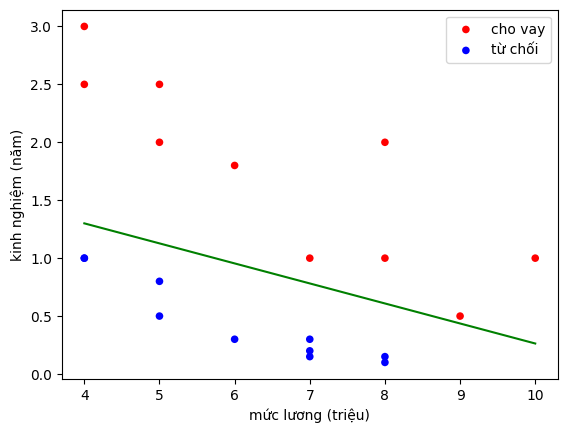

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 26 13:49:07 2019

@author: DELL
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Load data từ file csv
data = pd.read_csv('dataset.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

# Vẽ data bằng scatter
x_cho_vay = x[y[:,0]==1]
x_tu_choi = x[y[:,0]==0]

plt.scatter(x_cho_vay[:, 0], x_cho_vay[:, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x_tu_choi[:, 0], x_tu_choi[:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))

w = np.array([0.,0.1,0.1]).reshape(-1,1)

# Số lần lặp bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01

for i in range(1, numOfIteration):
    
	 # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(x.T, y_predict-y)	 
    print(cost[i])

# Vẽ đường phân cách.
t = 0.5
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()